In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from fredapi import Fred
fred_key = '9a9c69745bc32b9678c0207caa1a119a'
#import ta
import yfinance as yf

In [2]:
# welche Indikatoren?
# NETLIQ, FV?, 1) Automobile Sales 2) Chain Store Sales3) Consumer Sentiment
# 4) Existing Home Sales 5) Underemployment or Slack
# average weekly hours in manufacturing, building permits, stock prices and leading credit index

In [3]:
#create fred object
fred = Fred(api_key=fred_key)

In [4]:
ids = ('WALCL','WTREGEN', 'RRPONTSYD', 'SP500')

In [5]:
all_results = []

for myid in ids:
    results = fred.get_series(series_id=myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    
df = pd.concat(all_results, axis=1)
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')
df = df.dropna()

In [8]:
df['NET_LIQ'] = (df.WALCL - df.WTREGEN * 1000 - df.RRPONTSYD * 1000)/(1000*1000)
df['SP_FV'] = df.SP500 - ((df.WALCL - df.WTREGEN * 1000 - df.RRPONTSYD * 1000)/1000/1.1-1625)

In [9]:
df['SP_FV'].tail(5)

2022-12-26     88.810000
2022-12-27     88.810000
2022-12-28    108.001818
2022-12-29    187.985455
2022-12-30    401.293636
Name: SP_FV, dtype: float64

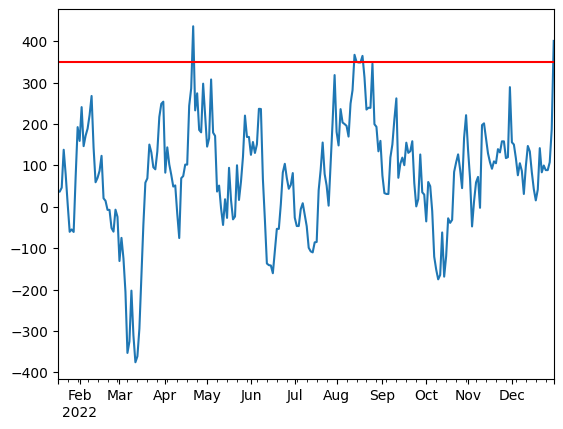

In [7]:
df['SP_FV'].tail(250).plot()
plt.axhline(y = 350, color = 'r', linestyle = '-')
plt.show()

In [13]:
fv_df = df['SP_FV'].tail(250)
fv_df['up_signal'] = 350

In [14]:
fv_df

2021-12-27 00:00:00     84.131818
2021-12-28 00:00:00    130.852727
2021-12-29 00:00:00    142.510000
2021-12-30 00:00:00    331.462727
2021-12-31 00:00:00    508.100000
                          ...    
2022-12-06 00:00:00     76.319091
2022-12-07 00:00:00    105.419091
2022-12-08 00:00:00    157.212727
2022-12-09 00:00:00    101.514545
up_signal              350.000000
Name: SP_FV, Length: 251, dtype: float64